비지도 학습은 타겟값이 없고 데이터만 순수하게 존재하는 경우를 의미한다. <br>
목표를 어떻게 설정하느냐에 따라 종류는 굉장히 많다. <br>

특징 위주로 공부하고, 경우에 따라 내가 이것 저것 try할 수 있는 능력을 키우면 된다. <br>
클러스터의 갯수를 미리 알려줘야 하는 방법도 있고, 클러스터의 갯수까지도 찾아주는 방법도 있다. <br>
두가지 모두 고유한 하이퍼파라미터들이 있다. 그 튜닝에 익숙해 지는 것이 중요하다. 

# 군집화

주어진 데이터 집합을 유사한 데이터들의 그룹으로 나누는 것을 군집화(clustering)라 하고 이렇게 나누어진 유사한 데이터의 그룹을 군집(cluster)이라 한다. 

군집화는 예측 문제와 달리 특정한 독립변수와 종속변수의 구분도 없고 학습을 위한 목푯값도 필요로 하지 않는 비지도학습의 일종이다.

## 군집화 방법

군집화 방법에는 목적과 방법에 따라 다양한 모형이 존재한다. 

* K-평균 군집화(K-means Clustering)
* 디비스캔 군집화(DBSCAN Clustering)
* 유사도 전파 군집화(Affinity Propagation Clustering)
* 계층적 군집화(Hierarchical Clustering)
* 스펙트럴 군집화(Spectral Clustering)

군집화 방법은 사용법과 모수 등이 서로 다르다. 예를 들어 K-평균법이나 스펙트럴 군집화 등은 군집의 개수를 미리 지정해주어햐 하지만 디비스캔이나 유사도 전파법 등은 군집의 개수를 지정할 필요가 없다. 다만 이 경우에는 모형에 따라 특별한 모수를 지정해주어야 하는데 이 모수의 값에 따라 군집화 개수가 달라질 수 있다. 

다음은 몇가지 예제 데이터에 대해 위에서 나열한 군집화 방법을 적용한 결과이다. 같은 색상의 데이터는 같은 군집로 분류된 것이다.
그림에서 보다시피 각 군집화 방법마다 특성이 다르므로 원하는 목적과 데이터 유형에 맞게 사용해야 한다. 또한 지정된 모수의 값에 따라 성능이 달라질 수 있다. 이 결과는 최적화된 모수를 사용한 결과는 아니라는 점에 유의하라. 

In [ ]:
from sklearn.datasets import *
from sklearn.cluster import *
from sklearn.preprocessing import StandardScaler
from sklearn.utils._testing import ignore_warnings

np.random.seed(0)
n_samples = 1500
blobs = make_blobs(n_samples=n_samples, random_state=8)
X, y = make_blobs(n_samples=n_samples, random_state=170)
anisotropic = (np.dot(X, [[0.6, -0.6], [-0.4, 0.8]]), y)
varied = make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=170)
noisy_circles = make_circles(n_samples=n_samples, factor=.5, noise=.05)
noisy_moons = make_moons(n_samples=n_samples, noise=.05)
no_structure = np.random.rand(n_samples, 2), None
datasets = {
    "Same Size Circle": blobs, 
    "Same Size Oval": anisotropic, 
    "Different Size Circle": varied, 
    "Crescent Moon": noisy_moons, 
    "Concentric Circle": noisy_circles, 
    "Non-Structured": no_structure
}

plt.figure(figsize=(11, 11))
plot_num = 1
for i, (data_name, (X, y)) in enumerate(datasets.items()):
    if data_name in ["Crescent Moon", "Concentric Circle"]:
        n_clusters = 2
    else:
        n_clusters = 3

    X = StandardScaler().fit_transform(X)

    two_means = MiniBatchKMeans(n_clusters=n_clusters)
    dbscan = DBSCAN(eps=0.15)
    spectral = SpectralClustering(n_clusters=n_clusters, affinity="nearest_neighbors")
    ward = AgglomerativeClustering(n_clusters=n_clusters)
    affinity_propagation = AffinityPropagation(damping=0.9, preference=-200)
    clustering_algorithms = (
        ('K-Means', two_means),
        ('DBSCAN', dbscan),
        ('Hierarchical Clustering', ward),
        ('Affinity Propagation', affinity_propagation),
        ('Spectral Clustering', spectral),
    )

    for j, (name, algorithm) in enumerate(clustering_algorithms):
        with ignore_warnings(category=UserWarning):
            algorithm.fit(X)
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)
        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i == 0:
            plt.title(name)
        if j == 0:
            plt.ylabel(data_name)
        colors = plt.cm.tab10(np.arange(20, dtype=int))
        plt.scatter(X[:, 0], X[:, 1], s=5, color=colors[y_pred])
        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plot_num += 1

plt.tight_layout()
plt.show()

- 하단 K-means는 보면 단순한 경우에는 잘 분류함. 그러나, 항상 모든 클러스터가 같은 크기에 원형이라고 가정함. 그래서, 타원/크기다른경우, 초승달, 동심원 등의 경우 잘 분류를 못한다.
- 그 외에도 잘 보면, 데이터 형태에 따라 잘 되는 경우가 조금씩 다르다. 이걸 잘 알고 있자. 
- 사이킷런에서 구현 된 클러스터링 중에 가장 복잡한게, Spectral/Optics가 있다. 

![1_149.png](./materials/1_149.png)

어쨋든 이런저런 방법론이 있고, 우리의 유일한 방법은 이것저것 try 해보고 좋은 것 써 보는 수 밖에 없다.  

## 군집화 성능기준

정답을 아는 상태(라벨링)에서 성능 측정하는 방식도 있고, 정말 아예 아무것도 모르는 상태에서 성능을 측정하는 것도 있다.<br>

군집화의 경우에는 분류문제와 달리 성능기준을 만들기 어렵다. 심지어는 원래 데이터가 어떻게 군집화되어 있었는지를 보여주는 정답(groundtruth)이 있는 경우도 마찬가지이다. 따라서 다양한 성능기준이 사용되고 있다. 다음의 군집화 성능기준의 예다.

* 조정 랜드지수(Adjusted Rand Index)
* 조정 상호정보량 (Adjusted Mutual Information)
* 실루엣계수 (Silhouette Coefficient)


조정 랜드지수, 조정 상호정보량은 라벨링이 미리 되어서 정답을 아는 경우에 쓸 수 있는 방법. 비교적 정확한 성능 평가가 나온다.<br>

실루엣 계수는 라벨링이 되어 있지 않은 경우에 어떻게든 대강이라도 추정을 해 보자고 만든 것. 간단한 클러스터에 대해서는 잘 동작하는데, 복잡한 클러스터의 경우에는 제대로 동작 안하는 경우도 많다. 

## 일치행렬 

랜드지수를 구하려면 데이터가 원래 어떻게 군집화되어 있어야 하는지를 알려주는 정답(groundtruth)이 있어야 한다. $N$개의 데이터 집합에서 $i$, $j$ 두 개의 데이터를 선택하였을 때 그 두 데이터가 같은 군집에 속하면 1 다른 군집에 속하면 0이라고 하자. 이 값을 $N \times N$ 행렬 $T$로 나타내면 다음과 같다.

$$ 
T_{ij} = 
\begin{cases} 
1 & \text{ $i$와 $j$가 같은 군집} \\
0 & \text{ $i$와 $j$가 다른 군집} \\
\end{cases}
$$

예를 들어 $\{0, 1, 2, 3, 4 \}$라는 5개의 데이터 집합에서 $\{0, 1, 2 \}$와 $\{ 3, 4 \}$가 각각 같은 군집라면 행렬 $T$는 다음과 같다.

{i, j}, {j, i} 두 경우는 같은 경우지. 

- 대각선은 당연히 모두 1
- 대칭 행렬
- 즉, 이 행렬에서 비대각성분 중 반쪽만 중요하고, 나머지는 대각 1 이거나 반대편 중복

In [7]:
groundtruth = np.array([
    [1, 1, 1, 0, 0],
    [1, 1, 1, 0, 0],
    [1, 1, 1, 0, 0],
    [0, 0, 0, 1, 1],
    [0, 0, 0, 1, 1],
])

이제 군집화 결과를 같은 방법으로 행렬 $C$로 표시하자. 만약 군집화이 정확하다면 이 행렬은 정답을 이용해서 만든 행렬과 거의 같은 값을 가져야 한다. 만약 군집화 결과 $\{0, 1 \}$과 $\{ 2, 3, 4 \}$가 같은 군집라면 행렬 $C$는 다음과 같다.

아래 행렬은, 실제 머신러닝 군집화를 시켰더니 이렇게 가져 왔다는 것.

In [8]:
clustering = np.array([
    [1, 1, 0, 0, 0],
    [1, 1, 0, 0, 0],
    [0, 0, 1, 1, 1],
    [0, 0, 1, 1, 1],
    [0, 0, 1, 1, 1],
])

**그럼 두 행렬 보면서, 딱 겹친다음에 같은 위치에 같은 숫자면 맞은 거고, 다른 위치에 다른 숫자면 틀린것.** <br>

이 두 행렬의 모든 원소에 대해 값이 같으면 1 다르면 0으로 계산한 행렬을 일치행렬(incidence matrix)이라고 한다. 즉 데이터 집합에서 만들수 있는 모든 데이터 쌍에 대해 정답과 군집화 결과에서 동일한 값을 나타내면 1, 다르면 0이 된다. 

$$ 
R_{ij} = 
\begin{cases} 
1 & \text{ if } T_{ij} = C_{ij} \\
0 & \text{ if } T_{ij} \neq C_{ij} \\
\end{cases}
$$

즉, 원래 정답에서 1번 데이터와 2번 데이터가 같은(다른) 군집인데 군집화 결과에서도 같은(다른) 군집이라고 하면 $R_{12} = 1$이다.

위 예제에서 일치행렬을 구하면 다음과 같다.

이렇게 나온 행렬을 **일치행렬(Incidence Matrix)**라고 부른다. 

In [9]:
incidence = 1 * (groundtruth == clustering)  # 1*는 True/False를 숫자 0/1로 바꾸기 위한 계산 
incidence

array([[1, 1, 0, 1, 1],
       [1, 1, 0, 1, 1],
       [0, 0, 1, 0, 0],
       [1, 1, 0, 1, 1],
       [1, 1, 0, 1, 1]])

여기서도 대각선은 당연히 똑같고, 비대각끼리 당연히 중복. <br>
대각선 빼고 딱 반쪽만 counting하면 몇개 맞았는지에 대한 counting 이 되겠지. 

이 일치 행렬은 두 데이터의 순서를 포함하므로 대칭행렬이다. 만약 데이터의 순서를 무시한다면 위 행렬에서 대각성분과 아래쪽 비대각 성분은 제외한 위쪽 비대각 성분만을 고려해야 한다. 위쪽 비대각 성분에서 1의 개수는 다음과 같아진다.

$$ 
a = \text{T에서 같은 군집에 있고 C에서도 같은 군집에 있는 데이터 쌍의 수, 1이 1인 것}
$$

$$ 
b = \text{T에서 다른 군집에 있고 C에서도 다른 군집에 있는 데이터 쌍의 수, 0이 0인 것}
$$


$$ 
\text{일치행렬 위쪽 비대각 성분에서 1의 개수} = a + b
$$

In [10]:
np.fill_diagonal(incidence, 0) # 대각성분 제외
a_plus_b = np.sum(incidence) / 2 # 대칭행렬이므로 절반만 센다.
a_plus_b

6.0

{0, 1, 2, 3, 4, 5}의 총 $5C2$ 10개 중에, 6개 맞은 것. 

## 랜드지수

랜드지수(Rand Index, RI)는 가능한 모든 데이터 쌍의 개수에 대해 정답인 데이터 쌍의 개수의 비율로 정의한다. 

$$
\text{Rand Index} = \dfrac{a+b}{{}_NC_2}
$$

In [12]:
incidence.shape

(5, 5)

In [11]:
from scipy.special import comb
rand_index = a_plus_b / comb(incidence.shape[0], 2)
rand_index

0.6

## 조정 랜드지수(ARI)

랜드지수 자체는 좋아. 0에서 1까지 값 들고 있고 0이면 최악 1이면 최고. <br>
그런데, 문제는 
1. 아무렇게나 막 랜덤하게 클러스터링을 해도 50점은 나와. 해보면 **기본점수**가 너무 높게 나옴.
2. 클러스터 갯수나 그런 것들에 따라서 그 기본점수도 막 달라진다. 



![1_150.jpeg](./materials/1_150.jpeg)

랜드지수는 0부터 1까지의 값을 가지고 1이 가장 좋은 성능을 뜻한다. 랜드지수의 문제점은 무작위로 군집화을 한 경우에도 어느 정도 좋은 값이 나올 가능성이 높다는 점이다. 즉 무작위 군집화에서 생기는 랜드지수의 기댓값이 너무 크다. 이를 해결하기 위해 무작위 군집화에서 생기는 랜드지수의 기댓값을 원래의 값에서 빼서 기댓값과 분산을 재조정한 것이 조정 랜드지수(adjusted Rand index, ARI)다. 

$$
\text{ARI} = 
\dfrac{\text{RI} - \text{E}[\text{RI}]}{\max(\text{RI}) - \text{E}[\text{RI}]}
$$

adjusted Rand index는 성능이 완벽한 경우 1이 된다. 반대로 가장 나쁜 경우로서 무작위 군집화을 하면 0에 가까운 값이 나온다. 경우에 따라서는 음수가 나올 수도 있다. 

위에서 예로 들었던 타원형 데이터 예제에 대해 여러가지 군집화 방법을 적용하였을때 조정 랜드지수를 계산해보면 디비스캔과 스펙트럴 군집화의 값이 높게 나오는 것을 확인할 수 있다. scikit-learn 패키지의 metrics.cluster 서브패키지는 조정 랜드지수를 계산하는 `adjusted_rand_score` 명령을 제공한다.

/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/cluster/_affinity_propagation.py:148: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(


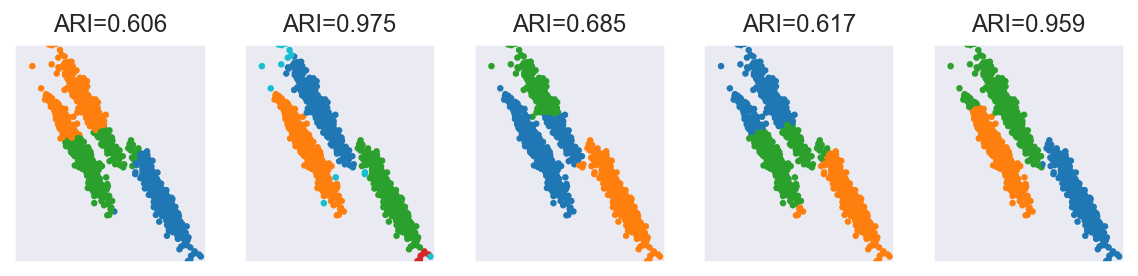

In [13]:
from sklearn.metrics.cluster import adjusted_rand_score

X, y_true = anisotropic

plt.figure(figsize=(12, 2))
plot_num = 1
X = StandardScaler().fit_transform(X)
for name, algorithm in clustering_algorithms:
    with ignore_warnings(category=UserWarning):
        algorithm.fit(X)
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(X)
    title = "ARI={:5.3f}".format(adjusted_rand_score(y_true, y_pred))
    plt.subplot(1, len(datasets), plot_num)
    plt.scatter(X[:, 0], X[:, 1], s=5, color=colors[y_pred])
    plt.xlim(-2.5, 2.5)
    plt.ylim(-2.5, 2.5)
    plt.xticks(())
    plt.yticks(())
    plt.title(title)
    plot_num += 1

눈으로 봐도 잘 되 보이는게 성능이 좋네

## 조정 상호정보량

두 확률변수간에 비선형적인 관계가 존재할 때, 그것을 측정할 수 있는 방법(P.712). 
아래 그림들은, 다 $cor$을 구하면 0이 나온다. <br>

내부적으로는 독립의 정의를 이용하는 수식이였음. 
![1_151.png](./materials/1_152.png)
![1_151.png](./materials/1_151.png)

상호정보량(mutual information)은 두 확률변수간의 상호 의존성을 측정한 값이다. 군집화 결과를 이산확률변수라고 가정한다. 

정답은 

$$ T = \{T_1, T_2,\ldots, T_r\} $$

의 $r$개의 값을 가질 수 있는 이산확률변수이고 군집화 결과는 

$$ C = \{C_1, C_2,\ldots, C_s\} $$

의 $s$개의 값을 가질 수 있는 이산확률변수라고 하자.

전체 데이터의 개수를 $N$이라고 하면 이산확률변수 $T$의 분포는

$$ P(i)=\frac{|T_i|}{N} $$

로 추정할 수 있다. 이 식에서 $|T_i|$는 군집 $T_i$에 속하는 데이터의 개수를 나타낸다.

비슷하게 이산확률변수 $C$의 분포는

$$ P'(j)=\frac{|C_i|}{N} $$

라고 추정하고 $T$와 $C$의 결합확률분포는

$$ P(i,j)=\frac{|T_i \cap C_j|}{N} $$

라고 추정한다. 여기에서 $|T_i \cap C_j|$는 군집 $T_i$에도 속하고 군집 $C_j$에도 속하는 데이터의 개수를 나타낸다.

확률변수 $T, C$의 상호정보량(쿨백라이블러발산으로 측정)은 

$$ MI(T,C)=\sum_{i=1}^r \sum_{j=1}^s P(i,j)\log \frac{P(i,j)}{P(i)P'(j)} $$

로 정의한다.

만약 두 확률변수가 서로 독립이면 상호정보량의 값은 0이며 이 값이 상호정보량이 가질 수 있는 최소값이다. 두 확률변수가 의존성이 강할수록 상호정보량은 증가한다. 또한 군집의 개수가 많아져도 상호정보량이 증가하므로 올바른 비교가 어렵다. 따라서 조정 랜드지수의 경우와 마찬가지로 각 경우에 따른 상호정보량의 기댓값을 빼서 재조정한 것이 조정 상호정보량이다.

Mutual Information도 RI에서 발생한 문제점이 똑같이 발생한다. <br>
아무렇게나 섞어서, 결과 내도 기본점수를 따고 들어간다. <br>
그래서 얘도 똑같이 기댓값 빼고 조정하게 된다. 

다음은 위에서 예로 들었던 타원형 데이터 예제에 대해 여러가지 군집화 방법을 적용하였을때 조정 상호정보량 값을 계산한 결과이다. scikit-learn 패키지의 metrics.cluster 서브패키지는 조정 상호정보량을 계산하는 `adjusted_mutual_info_score` 명령을 제공한다.

/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/cluster/_affinity_propagation.py:148: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(


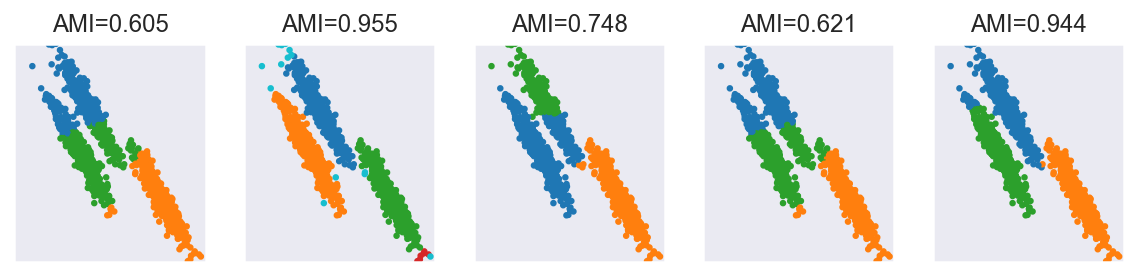

In [14]:
from sklearn.metrics.cluster import adjusted_mutual_info_score

X, y_true = anisotropic

plt.figure(figsize=(12, 2))
plot_num = 1
X = StandardScaler().fit_transform(X)
for name, algorithm in clustering_algorithms:
    with ignore_warnings(category=UserWarning):
        algorithm.fit(X)
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(X)
    title = "AMI={:5.3f}".format(adjusted_mutual_info_score(y_true, y_pred))
    plt.subplot(1, len(datasets), plot_num)
    plt.scatter(X[:, 0], X[:, 1], s=5, color=colors[y_pred])
    plt.xlim(-2.5, 2.5)
    plt.ylim(-2.5, 2.5)
    plt.xticks(())
    plt.yticks(())
    plt.title(title)
    plot_num += 1

이제 정답을 모르는 경우. <br>
사실 정확히 퍼포먼스 아는것은 불가능해. 그나마 추정을 해보자 해서 만든 것. <br>

## 실루엣계수

모든 데이터에 대해서 실루엣 넘버넘버를 다 계산을 하게 된다. <br>
근데, 이걸 계산하려면 a, b를 계산해야 한다. <br>
- a : 같은 편이랑 내가 얼마나 친한가. *내 편이랑 거리* 
- b : 내 군집 말고 다른 여러개의 군집이랑 다 거리를 측정을 해보고, 그 중에 제일 가까운 군집까지의 평균 거리. *다른 편이랑 거리*

상식적으로 클러스터링이 잘 됬으면, 내 편이랑은 거리가 가깝고 상대편이랑은 거리가 멀어야겠지. a는 작고 b는 커야겠지. <br>
- b-a가 양수가 나오는게, 정상일 것 같아. 
- 아래 max는 normalize일 뿐. 
- 어쨋든 아래 식이 음수면 뭔가 이상한 것일 것 같아. 그리고 크면 클수록 좋은 것일 것 같아 느낌이. 
- 근데 꼭 그렇지만도 않은 거 아래서 나옴.

지금까지는 각각의 데이터가 원래 어떤 군집에 속해있었는지 정답(groundtruth)를 알고 있는 경우를 다루었다. 하지만 이러한 정답 정보가 없다면 어떻게 군집화이 잘되었는지 판단할 수 있을까? 실루엣계수(Silhouette coefficient)는 이러한 경우에 군집화의 성능을 판단하기 위한 기준의 하나이다.

우선 모든 데이터 쌍 $(i, j)$에 대해 거리 혹은 비유사도(dissimilarity)을 구한다. 이 결과를 이용하여 모든 데이터 $i$에 대해 다음 값을 구한다.

* $a_i$ : $i$와 같은 군집에 속한 원소들의 평균 거리
* $b_i$ : $i$와 다른 군집 중 가장 가까운 군집까지의 평균 거리

이 때 데이터  $i$에 대한 실루엣계수는 

$$ s_i = \dfrac{b_i - a_i}{\max{(a_i, b_i)}} $$

로 정의한다. 전체 데이터의 실루엣계수를 평균된 값을 평균 실루엣계수라고 한다.

만약 데이터 $i$에 대해 같은 군집의 데이터가 다른 군집의 데이터보다 더 가깝다면 그 데이터의 실수엣 계수는 양수가 된다. 하지만 만약 다른 군집의 데이터가 같은 군집의 데이터보다 더 가깝다면 군집화이 잘못된 경우라고 볼 수 있는데 이 때는 그 데이터의 실루엣계수가 음수가 된다. 잘못된 군집화에서는 실루엣계수가 음수인 데이터가 많아지므로 평균 실루엣계수가 작아진다. 따라서 실루엣계수가 클수록 좋은 군집화이라고 할 수 있다.

군집화 방법 중에는 군집의 개수를 사용자가 정해주어야 하는 것들이 있는데 실루엣계수는 이 경우 군집의 개수를 정하는데 큰 도움이 된다. 
앞에서 예로 들었던 3개의 원형 데이터에 대해 K-평균 방법으로 군집 개수를 바꾸어가면서 군집화 결과를 살펴보자. 

scikit-learn 패키지의 metrics 서브패키지는 실루엣계수를 계산하는 `silhouette_samples` 명령을 제공한다.

```
silhouette_samples(X, y_pred)
```

/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn

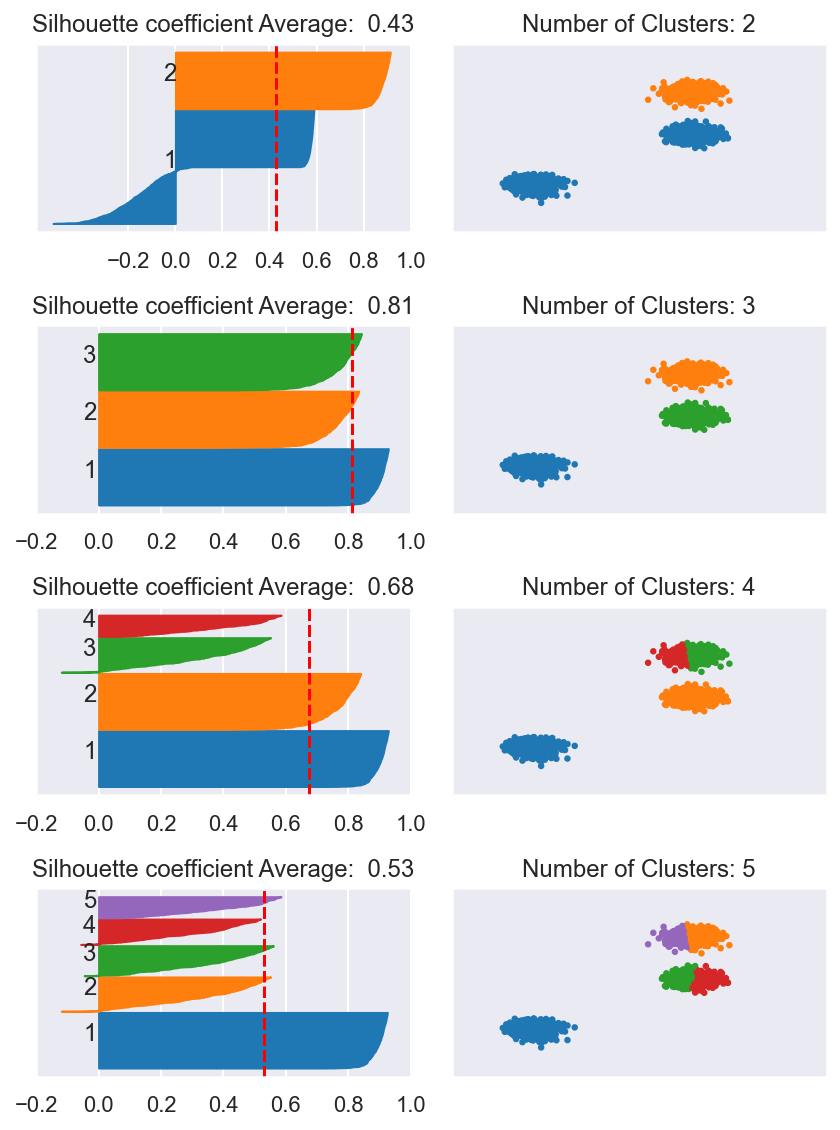

In [17]:
from sklearn.metrics import silhouette_samples

def plot_silhouette(data):
    X = StandardScaler().fit_transform(data[0])
    colors = plt.cm.tab10(np.arange(20, dtype=int))
    plt.figure(figsize=(6, 8))
    for i in range(4):
        model = SpectralClustering(n_clusters=i + 2, affinity="nearest_neighbors")
        cluster_labels = model.fit_predict(X)
        sample_silhouette_values = silhouette_samples(X, cluster_labels)
        silhouette_avg = sample_silhouette_values.mean()

        plt.subplot(4, 2, 2 * i + 1)
        y_lower = 10
        for j in range(i + 2):
            jth_cluster_silhouette_values = sample_silhouette_values[cluster_labels == j]
            jth_cluster_silhouette_values.sort()
            size_cluster_j = jth_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_j
            plt.fill_betweenx(np.arange(y_lower, y_upper),
                              0, jth_cluster_silhouette_values,
                              facecolor=colors[j], edgecolor=colors[j])
            plt.text(-0.05, y_lower + 0.5 * size_cluster_j, str(j + 1))
            plt.axvline(x=silhouette_avg, color="red", linestyle="--")
            plt.xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
            plt.yticks([])
            plt.title("Silhouette coefficient Average: {:5.2f}".format(silhouette_avg))
            y_lower = y_upper + 10


        plt.subplot(4, 2, 2 * i + 2)
        plt.scatter(X[:, 0], X[:, 1], s=5, color=colors[cluster_labels])
        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.title("Number of Clusters: {}".format(i + 2))

    plt.tight_layout()
    plt.show()
    
plot_silhouette(blobs)

오른쪽 그래프는, 총 150개 데이터에 대해서 실루엣 계수 싹다 구한 다음에, bar chart로 표현한 것. 이 그림이 이상해 보이는게, 150개나 되는게 바가 작은 폭에 켭켭이 쌓여 있어서 그림이 뭔가 도형처럼 보이고 하는 것. <br>
빨간 점선은 **150개 전체의 실루엣 계수 평균**

K-means는 클러스터 갯수를 하이퍼파라미터로 줘야 함. <br>
근데, 애초에 그걸 알고 있으면 거의 다 안거 아녀?... 그걸 정해주는것도 장난이 아니야. <br>
trial-and-error를 해봐야 되는거야. 그게, 위 그림이야. cluster 2, 3, 4, 5를 주면서 시도 해 본 것. <br>

원래 데이터는 사실 3개 클러스터. <br>
- Cluster=2일 때, 
    - 밑쪽 오렌지점이 보기에 내 편이랑의 평균 거리는 어떨까? 
    - 음수 되는 부분 엄청 많이 나옴. 
    
- Cluster=3일 때, 
    - 실루엣 계수 음수가 하나도 없네. 
- Cluster=4
    - 하나의 클러스터가 반으로 쪼개져 있네
    - 바 차트 잘 보면 음수가 발생했음. 
    
- ![1_153.jpeg](./materials/1_153.jpeg)
    
    
- 이제 이런거 보면서, cluster는 3개가 적당하구나 이런식으로 추정해 볼 수 있겠지. 

근데 솔직히 간단한 경우니깐 이것도 되는거고, 복잡하면 또 꼭 그렇게 되지도 않는다. 

다만 실루엣계수는 군집의 형상이 복잡하거나 크기의 차이가 많이나면 정상적인 비교가 불가능하다.

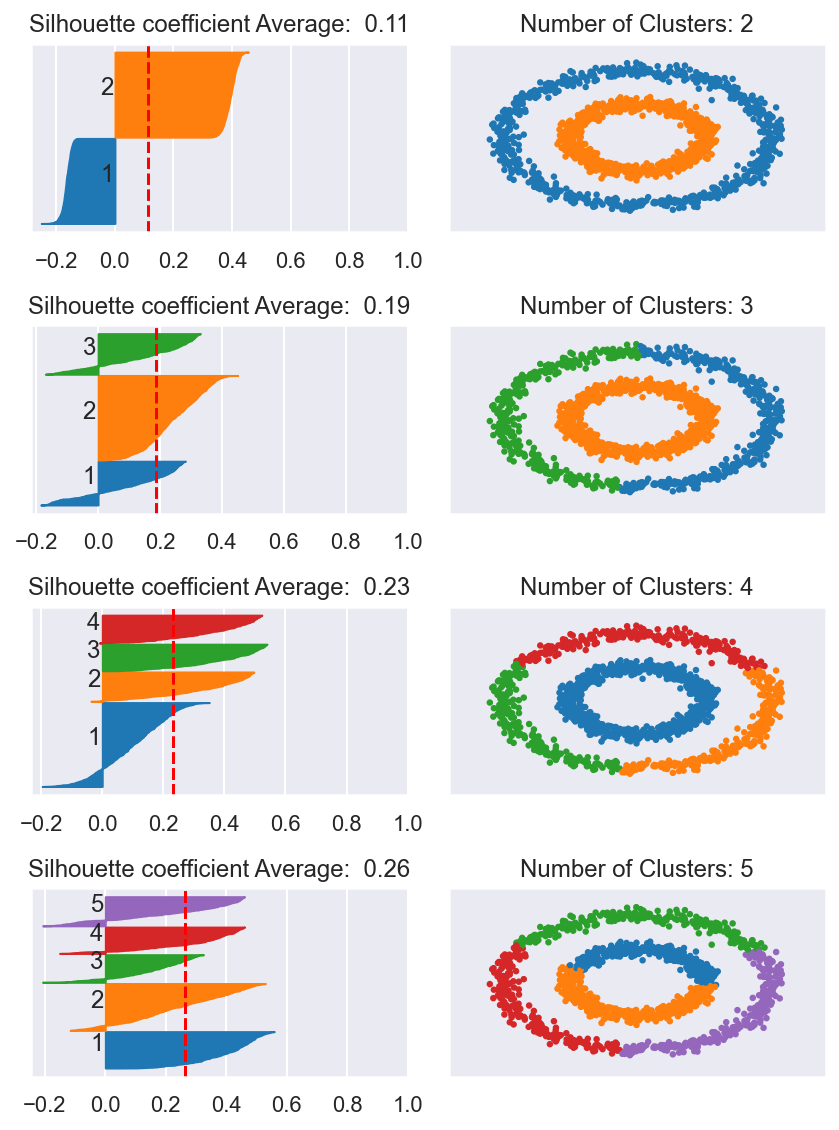

In [18]:
plot_silhouette(noisy_circles)

지금 이 동심원 케이스 보면, 사실 `cluster=2`인 제일 위 케이스가 제일 잘 된거야. <br> 
그런데, 실루엣 계수 보면 동심원 밖에 있는애들은 싹다 실루엣 계수가 음수가 나옴(동심원이 크니깐 그렇게 되겠지?).<br>  

가장 성능 좋은게, 실루엣 계수 제일 나쁘게 나오는 현상이 발생해버림. 잘게 쪼갤수록 점수 높게 나와버린다. 

**결국 제일 좋은 거는, 내가 어떻게든 라벨링을 해서 사용하는게 가장 좋은 방법이다.**

# K-평균 군집화

장점 
- 알고리즘이 굉장히 단순해서 비교적 빨리 돌아간다. 
- prediction이 가능하다. clustering 다 해놨더니 빠진 training 데이터 하나가 생각났어. 그럼 처음부터 싹다 다시 돌려야 하는가?
    - 빠진 친구랑 가장 가까운 대장이 누구인지만 정하면 된다. 가장 가까운 대장만 정하면 빠진 데이터가 어느 군집으로 분류 되었을지 알 수 있다.
    - 물론 하나가 더 들어가면 대장의 위치 자체가 바뀔 순 있는데, 데이터가 굉장히 많으면 하나 더 들어갔다고 크게 영향도 없다. 

단점 
- 클러스터가 원 모양이고 크기가 모두 같(비슷하)다고 가정. 
- 이 가정에 어긋난 복잡한 모형으로 데이터가 배치하고 있으면 제대로 할 수가 없다. 
- 또한, K값을 내가 정해줘야 한다. 

$J$를 제일 작게 하는 각 군집의 중심위치와 군집을 같이 찾는다. <br>

![1_154.jpeg](./materials/1_154.jpeg)


이 과정을 반복하면 된다. 그러면, 어딘가에서 더 이상 J가 변하지 않는 곳이 나온다. <br>
그 더이상 안변하는 곳이 반드시 온다는 것은 수학적으로 증명되어 있다. <br>
단, 그게 전역 최적점이라고 보장할 순 없다. Local Minimum에서 끝날 수도 있다. <br>
만약에 안멈추면, max-iter정해서 거기서 끊어버리면 된다. 

사실 이런 방법을 더 넓은 범위에서 `K-Centroid`방법이라고 부른다.  <br>
지금은 이제 대장을 고를 때, 꼭 데이터가 아니라 위치를 중심으로 정했음. 그러나, 꼭 데이터중에 대장을 정해야 되는 경우도 있다. <br>
그러면, 그것은 중앙값을 쓰는 방식이다. <br>
그래서, 이 경우에는 `K-Median` 군집화 라고 부른다. <br>

어쨋든 이런 방식을 다 합쳐서 `K-Centroid`방법 이라고 부른다. 

K-평균 군집화 방법은 가장 단순하고 빠른 군집화 방법의 하나이다. 
다음과 같은 목적함수 값이 최소화될 때까지 군집의 중심위치와 각 데이터가 소속될 군집를 반복해서 찾는다. 이 값을 관성(inertia)이라 한다.

$$ J = \sum_{k=1}^K \sum_{i \in C_k} d(x_i, \mu_k)  $$

이 식에서 $K$는 군집의 갯수이고 $C_k$는 $k$번째 군집에 속하는 데이터의 집합, $\mu_k$는 $k$번째 군집의 중심위치(centroid), $d$는 $x_i, \mu_k$ 두 데이터 사이의 거리 혹은 비유사도(dissimilarity)로 정의한다. 만약 유클리드 거리를 사용한다면 다음과 같다.

$$ d(x_i, \mu_k) = || x_i - \mu_k ||^2 $$

위 식은 다음처럼 표현할 수도 있다.

$$ 
J = \sum_{i=1}^{N}\min_{\mu_j \in C}(||x_i - \mu_j||^2)  
$$


세부 알고리즘은 다음과 같다.

1. 임의의 중심위치 $\mu_k\,(k=1,\ldots,K)$를 고른다. 보통 데이터 표본 중에서 $K$개를 선택한다.
2. 모든 데이터 $x_i\,(i=1,\ldots, N)$에서 각각의 중심위치 $\mu_k$까지의 거리를 계산한다.
3. 각 데이터에서 가장 가까운 중심위치를 선택하여 각 데이터가 속하는 군집을 정한다.
4. 각 군집에 대해 중심위치 $\mu_k$를 다시 계산한다. 
5. 2 ~ 4를 반복한다.


K-평균 군집화란 명칭은 각 군집의 중심위치를 구할 때 해당 군집에 속하는 데이터의 평균(mean)값을 사용하는데서 유래하였다. 만약 평균 대신 중앙값(median)을 사용하면 K-중앙값(K-Median) 군집화라 한다.  

scikit-learn의 cluster 서브패키지는 K-평균 군집화를 위한 `KMeans` 클래스를 제공한다. 다음과 같은 인수를 받을 수 있다.

* `n_clusters`: 군집의 갯수(내가 정해줘야 한다)
* `init`: 초기화 방법. `"random"`이면 무작위(위에서 설명한 방법, 처음에 랜덤하게 데이터 중에 아무나 정하는 방법), `"k-means++"`이면 K-평균++ 방법. 또는 각 데이터의 군집 라벨. 
* `n_init`: 초기 중심위치 시도 횟수. 디폴트는 10이고 10개의 무작위 중심위치 목록 중 가장 좋은 값을 선택한다.
    - 이게 중요한게, K-centroid 돌리다 보면 분명히 어딘가에는 수렴하지만, 그게 global minimum이라는 장담을 못한다. local minimum일 수도 있다. 
    - 그 local/global 중 어디로 수렴될 것인지에 가장 중요한 것이 초기값(첫 대장). 
    - 그래서, 그 초깃값을 어디에서 시작하는지를 몇번 반복해보고 가장 좋은 것을 고르게 된다. 
* `max_iter`: 최대 반복 횟수.
* `random_state`: 시드값.


다음은 `make_blobs` 명령으로 만든 데이터를 2개로 K-평균 군집화하는 과정을 나타낸 것이다. 각각의 그림은 군집을 정하는 단계 3에서 멈춘 것이다. 마커(marker)의 모양은 소속된 군집을 나타내고 크기가 큰 마커가 해당 군집의 중심위치다. 각 단계에서 중심위치는 전단계의 군집의 평균으로 다시 계산되는 것을 확인할 수 있다.

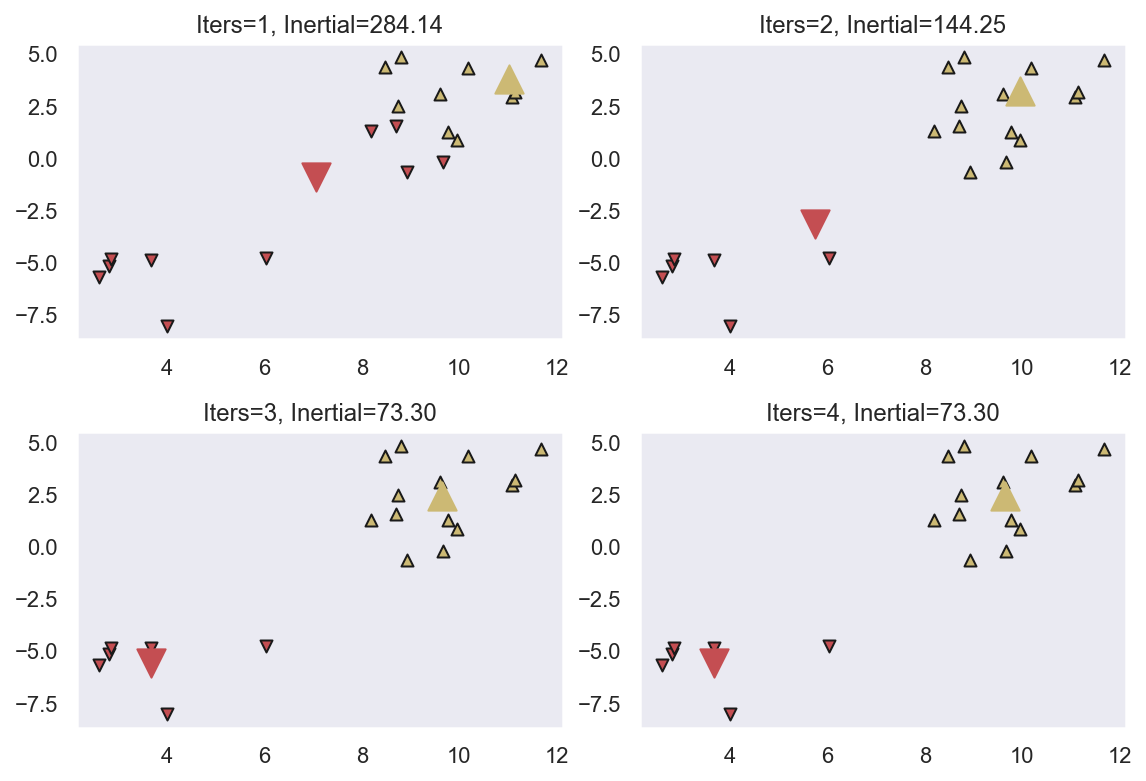

In [20]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, _ = make_blobs(n_samples=20, random_state=4)

def plot_KMeans(n):
    model = KMeans(n_clusters=2, init="random", n_init=1, max_iter=n, random_state=6).fit(X)
    c0, c1 = model.cluster_centers_
    plt.scatter(X[model.labels_ == 0, 0], X[model.labels_ == 0, 1], marker='v', facecolor='r', edgecolors='k')
    plt.scatter(X[model.labels_ == 1, 0], X[model.labels_ == 1, 1], marker='^', facecolor='y', edgecolors='k')
    plt.scatter(c0[0], c0[1], marker='v', c="r", s=200)
    plt.scatter(c1[0], c1[1], marker='^', c="y", s=200)
    plt.grid(False)
    plt.title("Iters={}, Inertial={:5.2f}".format(n, -model.score(X)))

plt.figure(figsize=(8, 8))
plt.subplot(321)
plot_KMeans(1)
plt.subplot(322)
plot_KMeans(2)
plt.subplot(323)
plot_KMeans(3)
plt.subplot(324)
plot_KMeans(4)
plt.tight_layout()
plt.show()

위에서 서술한 1, 2, 3, 4번 스텝을 보여주는 것. 
- iter1 : 처음에 아무데나 골라서 대장 정하고, 각자 데이터들 대장한테 가서 붙어. 
- iter2 : iter1에서 cluster에서 중심위치 정해. 그리고 다시 각자 거리 가까운 대장 정해. 
- iter3, iter4 : iter2 반복
- 더 이상 중심이 변하지 않을 때까지 반복하다가 stop

K-평균 군집화는 항상 수렴하지만 최종 군집화 결과가 전역 최적점이라는 보장은 없다. 군집화 결과는 초기 중심위치에 따라 달라질 수 있다.

K-means clustering은 유클리드 거리를 사용한다. <br>
그래서, 차원이 높아지면 거리가 다 비슷해진다. 
$$x_1^2+x_2^2+x_3^2+x_4^2+x_4^2...x_k^2$$ 
이렇게 다 더해가는데, 차원이 높아지면 이 거리가 비슷비슷하게 나오는 현상이 발생한다. <br>
그러면, 제대로 clustering하기가 어려울 수 있겠지. <br>
그래서, PCA로 차원축소를 해서, 다시 clustering을 하면 성능이 좋은 케이스들이 있다. 


(하단 연습문제 14.2.1 참고)

## K-평균++ 알고리즘

맨 처음 초기값을 정할때, 가능한 한 초기 대장들이 서로 붙어있지 않게 정하는 것. <br>
클러스터링이라는 거는 무리를 크게 나누는건데, 당연히 클러스터링을 하면 중심과 중심이 떨어져 있겠지. <br>
처음에 딱 붙어있는 애 두명 데려와놓고 그게 중심위치고 대장이다 하면 뭔가 잘못된거지. <br>
**처음부터 중심을 좀 더멀리 떨어지게 놓으면, 더 빠르게 좋게 수렴하지 않을까?**라는 생각.<br>

1. 맨 처음에 중심 한개 랜덤하게 정한다. 
2. 그리고, 나머지들 중에 중심을 찾는데 주사위 던져서 찾는다. 정확히는 카테고리 분포로 찾는데, 확률은 지금 랜덤하게 뽑힌 거리에 비례하게 셋팅한다.  
3. 즉, 지금 랜덤하게 뽑혔던 대장에서 멀리 있는 애들이 두번째 대장으로 뽑힐 가능성이 높다. 
    - 단 이것은 가능성일 뿐. 확률이 가장 높을 뿐이지 반드시 그게 뽑힌다는 보장은 없다. 
4. 두번째 대장까지 뽑고 나서, ***앞에서 뽑은 두 대장 중에 가까운 대장과의 거리에 비례해서 확률 셋팅***. 다시 추출.
5. K개 대장 뽑힐 때까지 반복. 
6. 초깃값 다 잡은 후에는 K-means방법을 그대로 쓰면 된다. 



**즉, K++은 특별한게 아니고, K-means에서 맨 첫 대장 뽑는 방법만 추가한 것.**

K-평균++ 알고리즘은 초기 중심위치를 설정하기 위한 알고리즘이다. 다음과 같은 방법을 통해 되도록 멀리 떨어진 중심위치 집합을 찾아낸다.


1. 중심위치를 저장할 집합 $M$ 준비
2. 일단 하나의 중심위치 $\mu_0$를 랜덤하게 선택하여 $M$에 넣는다.
3. $M$에 속하지 않는 모든 표본 $x_i$에 대해 거리 $d(M, x_i)$를 계산. $d(M, x_i)$는 $M$안의 모든 샘플 $\mu_k$에 대해  $d(\mu_k, x_i)$를 계산하여 가장 작은 값 선택
4. $d(M, x_i)$에 비례한 확률로 다음 중심위치 $\mu$를 선택.
5. $K$개의 중심위치를 선택할 때까지 반복
6. K-평균 방법 사용

다음은 K-평균++ 방법을 사용하여 MNIST Digit 이미지 데이터를 군집화한 결과이다. 각 군집에서 10개씩의 데이터만 표시하였다. 

In [27]:
?load_digits

In [28]:
digits.data.shape

(1797, 64)

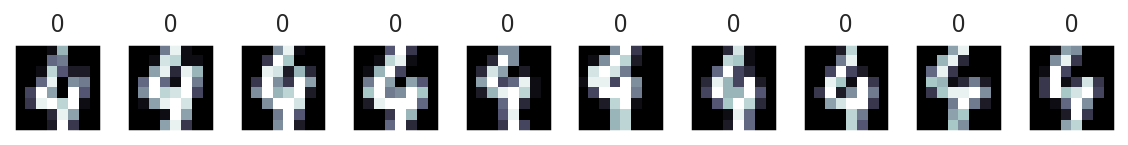

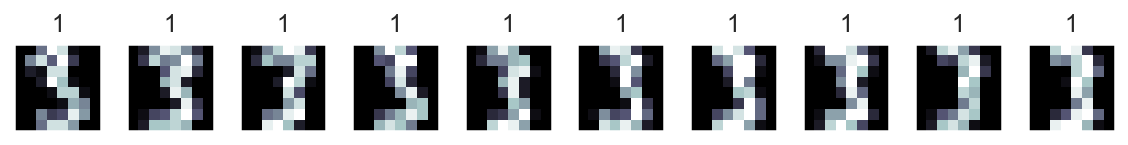

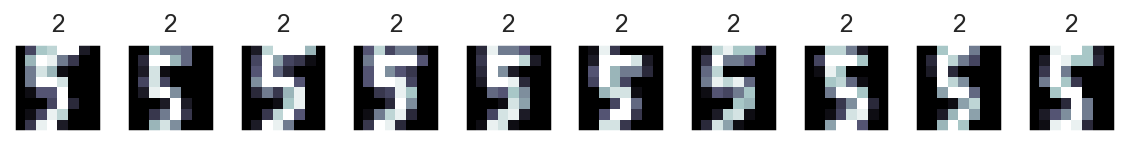

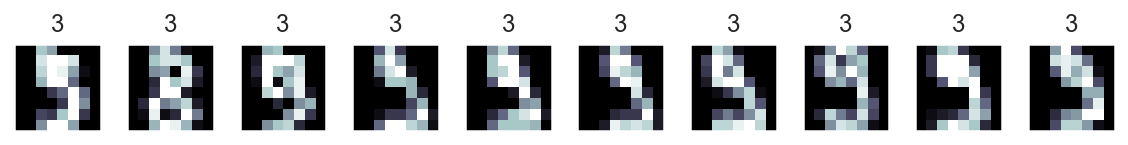

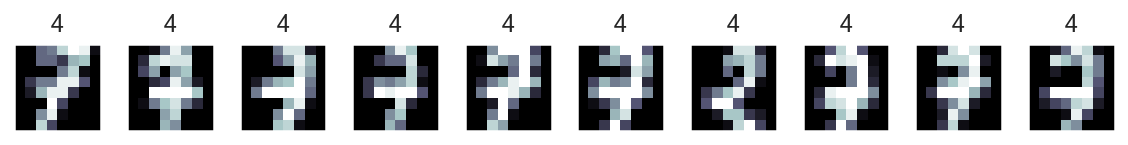

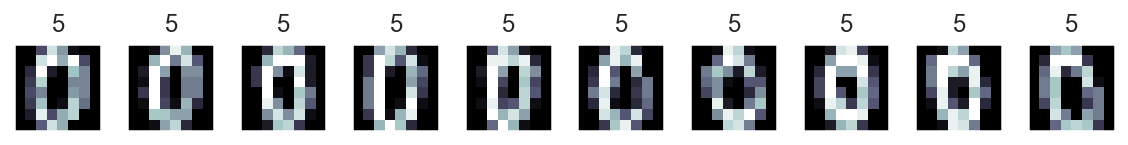

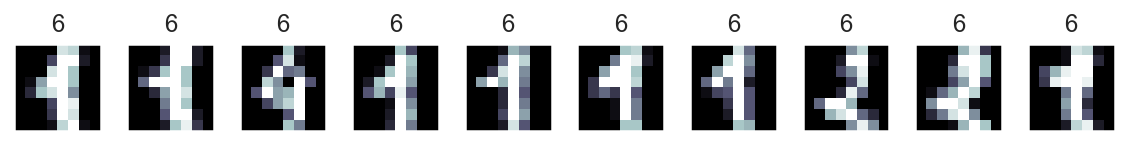

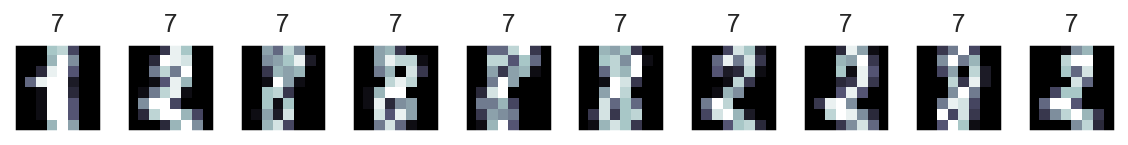

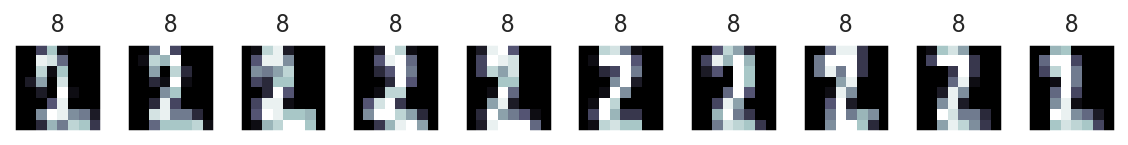

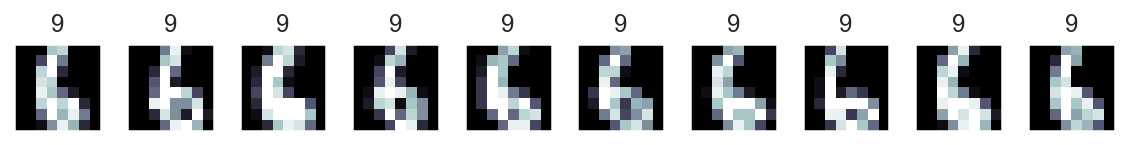

In [21]:
from sklearn.datasets import load_digits

digits = load_digits()

model = KMeans(init="k-means++", n_clusters=10, random_state=0)
model.fit(digits.data)
y_pred = model.labels_

def show_digits(images, labels):
    f = plt.figure(figsize=(8, 2))
    i = 0
    while (i < 10 and i < images.shape[0]):
        ax = f.add_subplot(1, 10, i + 1)
        ax.imshow(images[i], cmap=plt.cm.bone)
        ax.grid(False)
        ax.set_title(labels[i])
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.tight_layout()
        i += 1
        
def show_cluster(images, y_pred, cluster_number):
    images = images[y_pred == cluster_number]
    y_pred = y_pred[y_pred == cluster_number]
    show_digits(images, y_pred)
    

for i in range(10):
    show_cluster(digits.images, y_pred, i)

위 코드는 MINST를 K-means++로 클러스터링 해본 것. 

이미지의 제목에 있는 숫자는 군집 번호에 지나지 않으므로 원래 숫자의 번호와 일치하지 않는다. 하지만 이를 예측문제라고 가정하고 분류결과 행렬을 만들면 다음과 같다.<br>

`confusion_matrix`를 구하면, 분류에서는 대각선에 집중된게 좋은 거였음. <br>
지금 클러스터링 같은 경우에는 각 행마다 특정 열에 몰려 있으면 좋은 거겠지.<br>
어찌됬든 같은 행(같은 숫자 사진)이 같은 군집으로 분류됬다는 거니깐. <br>
지금 분류에서, 군집 번호는 아무 의미가 없음. 그냥 컴퓨터가 지가 알아서 만든 cluster numbering 먹인 것. 

In [22]:
from sklearn.metrics import confusion_matrix

confusion_matrix(digits.target, y_pred)

array([[  1,   0,   0,   0,   0, 177,   0,   0,   0,   0],
       [  0,   1,   1,   0,   0,   0,  55,  99,  24,   2],
       [  0,  13,   0,   2,   3,   1,   2,   8, 148,   0],
       [  0, 154,   2,  13,   7,   0,   0,   7,   0,   0],
       [163,   0,   0,   0,   7,   0,   7,   4,   0,   0],
       [  2,   0, 136,  43,   0,   0,   0,   0,   0,   1],
       [  0,   0,   0,   0,   0,   1,   1,   2,   0, 177],
       [  0,   0,   0,   0, 177,   0,   0,   2,   0,   0],
       [  0,   2,   4,  53,   5,   0,   5, 100,   3,   2],
       [  0,   6,   6, 139,   7,   0,  20,   2,   0,   0]])

In [23]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

이 군집화 결과의 ARI, AMI, 실루엣계수값은 다음과 같다.

In [29]:
from sklearn.metrics.cluster import adjusted_mutual_info_score, adjusted_rand_score, silhouette_score

print("ARI:", adjusted_rand_score(digits.target, y_pred))
print("AMI:", adjusted_mutual_info_score(digits.target, y_pred))
print("Silhouette Score:", silhouette_score(digits.data, y_pred))

ARI: 0.668699122362767
AMI: 0.7443265633359039
Silhouette Score: 0.18251916424600556


실루엣계수가 엄청 낮게 나왔네. 

### PCA for presentation 

보통 아래 방법으로 clustering을 presentaion할 때 많이 쓴다. <br>

군집화 결과를 주성분 분석을 통해 2차원에 투영하면 다음과 같다. 겹쳐져 있는 부분은 고차원상에서는 떨어져 있을 수 있다.

겹쳐져 있는 애들도 많이 보인다. <br>
사실은 64차원에 있는 애들을 강제로 2차원에 투영시킨거라서, 실제로는 떨어져 있는 애들인데 2차원 상에서 붙어있는 것 처럼 보일 수 있다.<br>
3차원으로 하면 또 더 떨어져 있을 수도 있다. <br>
또, 3차원에서 겹쳐 있어도 4/5차원에서는 떨어져 있을 수도 있다. <br>


**PCA로 완벽히 잘됬는지 표현할 순 없어도, 그나마 시각화해서 발표하는 방법 중 하나이다.**

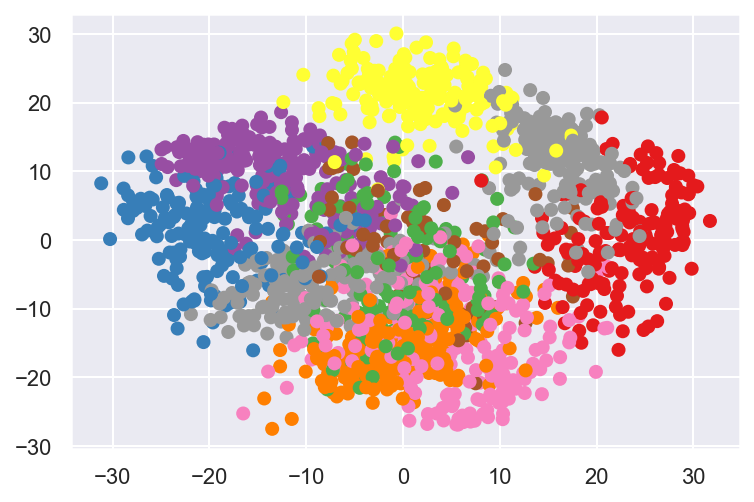

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(digits.data)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=plt.cm.Set1)
plt.show()

#### 연습 문제 14.2.1

K-평균 군집화는 유클리드 거리를 사용하므로 너무 차원이 높을 때는 군집화 성능이 떨이질 수 있다. 이때는 차원축소를 한 후 군집화를 하는 것이 도움이 될 수도 있다. 

MNIST Digit 데이터를 10차원으로 차원축소하여 K-평균 군집화하고 ARI, AMI, 실루엣계수를 각각 계산하여 차원축소를 하지 않았을 때와 비교하라.

K-means clustering은 유클리드 거리를 사용한다. <br>
그래서, 차원이 높아지면 거리가 다 비슷해진다. 
$$x_1^2+x_2^2+x_3^2+x_4^2+x_4^2...x_k^2$$ 
이렇게 다 더해가는데, 차원이 높아지면 이 거리가 비슷비슷하게 나오는 현상이 발생한다. <br>
그러면, 제대로 clustering하기가 어려울 수 있겠지. <br>
그래서, PCA로 차원축소를 해서, 다시 clustering을 하면 성능이 좋은 케이스들이 있다. 

*사실 이 차원축소를 몇차원으로 할건가?*도 하이퍼파라미터 튜닝의 주제이다. 

In [32]:
# Load Data
from sklearn.datasets import load_digits

digits = load_digits()
digits.data

(1797, 64)

In [41]:
# PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X = pca.fit_transform(digits.data)

In [42]:
X.shape

(1797, 10)

In [47]:
model = KMeans(init="k-means++", n_clusters=10, random_state=0)
model.fit(X)
y_pred = model.labels_

In [48]:
from sklearn.metrics import confusion_matrix

confusion_matrix(digits.target, y_pred)

array([[  0,   0,   0,   0,   0, 176,   0,   0,   2,   0],
       [  2,  99,   1,   0,  55,   0,  24,   0,   0,   1],
       [  0,   9,   0,   3,   1,   1, 151,   2,   0,  10],
       [  0,   6,   1,   7,   0,   0,   1,  18,   0, 150],
       [  0,   2,   0,  11,   4,   0,   0,   0, 164,   0],
       [  1,   0, 136,   0,   0,   0,   0,  42,   2,   1],
       [176,   4,   0,   0,   0,   1,   0,   0,   0,   0],
       [  0,   3,   4, 167,   3,   0,   0,   0,   2,   0],
       [  2,  93,  13,   5,   9,   0,   3,  45,   0,   4],
       [  0,   1,   7,   7,  20,   0,   0, 138,   0,   7]])

In [49]:
from sklearn.metrics.cluster import adjusted_mutual_info_score, adjusted_rand_score, silhouette_score

print("ARI:", adjusted_rand_score(digits.target, y_pred))
print("AMI:", adjusted_mutual_info_score(digits.target, y_pred))
print("Silhouette Score:", silhouette_score(digits.data, y_pred))

ARI: 0.6508088991001122
AMI: 0.7232409550682799
Silhouette Score: 0.18124190298729576


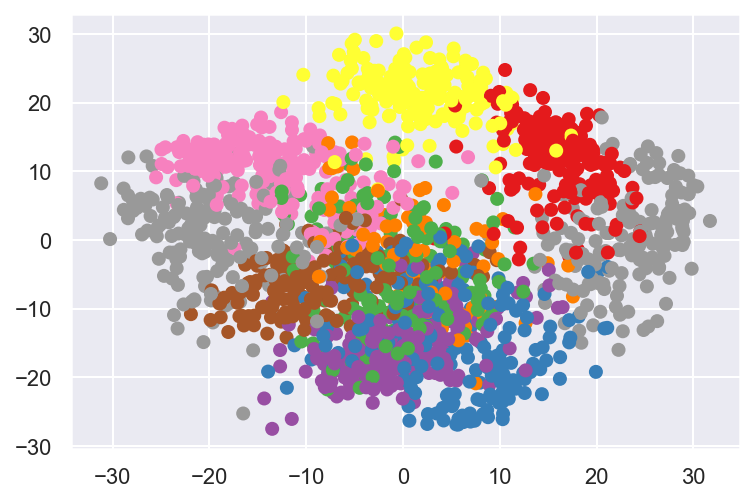

In [50]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=plt.cm.Set1)
plt.show()

#### 연습 문제 14.2.2

붓꽃 데이터를 K=3인 K-평균 군집화하여 ARI, AMI, 실루엣계수를 각각 계산하고 군집화 결과를 2차원상에 투영하여 표시하라. 

K-means가 단순하긴 하지만, 결국은 중간단계에서 중심위치와 모든 데이터와의 거리를 계속해서 계산해야 한다.<br>
그럼 데이터 갯수가 몇억개면 계산량이 비례해서 늘어나게 된다. <br>
혹은 메모리가 너무 작아서 모든 데이터 자체를 다 메모리에 담을 수 없을 수도 있다. <br>

그럴때, 아래의 방법을 쓴다. <br>
- 데이터를 랜덤하게 뽑는다(미니배치) 
- 그리고 그 미니배치만을 활용해서 클러스터링을 한다. 
- 그럼 당연히, 전체 데이터 사용해서 클러스터링 할때와 정확히 똑같은 값은 안나온다.
- 그래도 유사한 값이 나오더라. 

## 미니배치 K-평균 군집화

K-평균 방법에서는 중심위치와 모든 데이터 사이의 거리를 계산해야 하기 때문에 데이터의 갯수가 많아지면 계산량도 늘어단다. 데이터의 수가 너무 많을 때는 미니배치 K-평균(Mini-batch) 군집화 방법을 사용하면 계산량을 줄일 수 있다. 미니배치 K-평균 군집화는 데이터를 미니배치 크기만큼 무작위로 분리하여 K-평균 군집화를 한다. 모든 데이터를 한꺼번에 썼을 때와 결과가 다를 수는 있지만 큰 차이가 없다.  

사이킷런의 cluster 서브패키지는 미니배치 K-평균 군집화를 위한 `MiniBatchKMeans` 클래스를 제공한다. 미니배치 크기 `batch_size` 인수를 추가로 받는다. 

In [51]:
from sklearn.cluster import MiniBatchKMeans

150,000개의 데이터를 사용하여 실행 시간을 비교하자.

In [52]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150000, cluster_std=[1.0, 2.5, 0.5], random_state=170)

미니배치 군집화의 속도가 훨씬 빠른 것을 알 수 있다.

In [57]:
%%time

model1 = KMeans(n_clusters=3).fit(X)

CPU times: user 1.57 s, sys: 340 ms, total: 1.91 s
Wall time: 321 ms


`batch_size` : 한번 클러스터링 할 때, 몇번씩 뽑아서 할것인가.  <br>
갯수가 적으면 속도가 빨라진다. 대신, 정확도가 떨어진다. <br>
많이 뽑으면 정확도는 원래 original data랑 비슷해지는데 속도가 느려진다. <br>
그 사이를 잘 튜닝 해야 한다.

In [58]:
%%time

model2 = MiniBatchKMeans(n_clusters=3, batch_size=1000, compute_labels=True).fit(X)

CPU times: user 237 ms, sys: 37.4 ms, total: 274 ms
Wall time: 51.3 ms


군집화 결과는 그다지 차이가 없다.

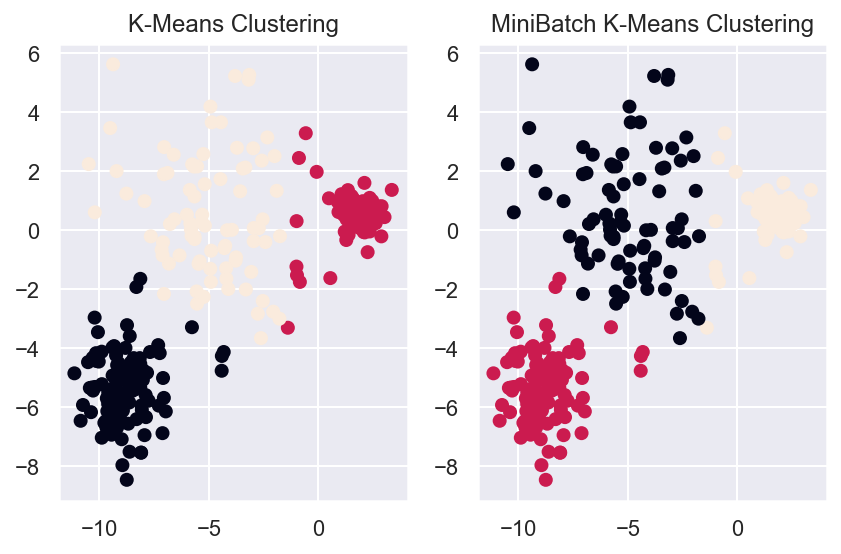

In [59]:
idx = np.random.randint(150000, size=300)
plt.subplot(121)
plt.scatter(X[idx, 0], X[idx, 1], c=model1.labels_[idx])
plt.title("K-Means Clustering")
plt.subplot(122)
plt.scatter(X[idx, 0], X[idx, 1], c=model2.labels_[idx])
plt.title("MiniBatch K-Means Clustering")
plt.tight_layout()
plt.show()

지금 미니배치가 뭐냐면, 15000개 데이터중에 딱 1000개만 써서 클러스터링 한거야. <br>
즉, 1000개만 써서 중심위치 정해 놓은 다음에, 그거가지고 15000개를 예측한 것. <br>
근데 분류 해놓은것 보면 데이터 전체 다 쓴거랑 큰 차이가 없음. <br>

#### 중요! 
**이게 무슨 의미일까?**<br>

라벨링을 다 할수가 없는 상황. 그러면, 일부만 뽑아서(전체 데이터의 특성을 표현할 수 있는 정도, 충분히 많이) 걔만 가지고 라벨링하고 성능을 평가하면,<br>
그 성능이 우리가 라벨링 안한 다른 데이터들에도 비슷한 성능이 나올 것이라고 충분히 가정할 수 있다는 것. 

### Color Quantization using K-Means

[scikit-learn description](https://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html#:~:text=Performs%20a%20pixel%2Dwise%20Vector,preserving%20the%20overall%20appearance%20quality.)

k-means 쓰는 다른 예 중 하나가 그림 압축. <br>
그림에는 color가 있다. 그리고, 그 color를 표현하기 위해 우리는 `RGB` 3차원의 값을 쓴다. <br>


![1_157.jpeg](./materials/1_157.jpeg)

현재 컬러 픽셀 96615(원래 10만개짜리 픽셀 사진인데, 겹치는 애들 있어서 살짝 적은 것)
![1_155.png](./materials/1_155.png)

위에서 컬러 픽셀을 64개로 군집화해서, 같은 군집 끼리는 싹다 대장 컬러 쓰게 64개 컬러로 몰아 넣음. 

![1_155.png](./materials/1_156.png)

그 다음에, <br>
- 1번 군집 대장 - 1로 표기
- 2번 군집 대장 - 2로 표기
- 64번 군집 대장 -64로 표기


<br>
이거랑, 각 대장이 원래 어떤 RGB였는지 컬러 테이블 표 만들어서 첨부. 

엄청 압축 되겠지. 이게 실제 비트맵이나, gif에서 쓰는 방식이다. 

#### 연습 문제 14.2.3

20 뉴스그룹 데이터를 K-평균 군집화하여 ARI, AMI, 실루엣계수를 각각 계산하고 군집화 결과를 2차원상에 투영하여 표시하라. 

K-means는 심플하고 좋은 알고리즘이지만, cluster의 갯수를 정해줘야 하고, 데이터가 같은 크기의 구 모양이라고 가정하기 때문에<br>
모양이 복잡해지면 제대로 클러스터링이 안된다. <br>

**그 단점을 극복하기 위해 만든 것이 DBScan**

# 디비스캔 군집화

- 군집의 형태에 구애받지 않는다.
- 군집의 갯수도 우리가 정해주는 것이 아니다. 
- 물론 그렇다고 사용자가 줘야 하는 하이퍼파라미터가 없을 리가 없다. 

K-평균 군집화 방법은 단순하고 강력한 방법이지만 군집의 모양이 원형이 아닌 경우에는 잘 동작하지 않으며 군집의 갯수를 사용자가 지정해주어야 한다는 단점이 있다.

디비스캔(DBSCAN: Density-Based Spatial Clustering of Applications with Noise) 군집화 방법은 데이터가 밀집한 정도 즉 밀도를 이용한다. 디비스캔 군집화는 군집의 형태에 구애받지 않으며 군집의 갯수를 사용자가 지정할 필요가 없다. 디비스캔 군집화 방법에서는 초기 데이터로부터 근접한 데이터를 찾아나가는 방법으로 군집을 확장한다. 이 때 다음 사용자 인수를 사용한다.

* 최소 거리 $\varepsilon$: 이웃(neighborhood)을 정의하기 위한 거리
* 최소 데이터 갯수(minimum points): 밀집지역을 정의하기 위해 필요한 이웃의 갯수

만약 $\varepsilon$ 최소 거리안의 이웃 영역 안에 최소 데이터 갯수 이상의 데이터가 있으면 그 데이터는 핵심(core) 데이터다. 이렇게 핵심 데이터를 찾아낸 다음에는 이 핵심 데이터의 이웃 영역 안에 있는 데이터를 이 핵심데이터와 연결된 핵심 데이터로 정의한다. 핵심 데이터의 이웃영역안에 있는 데이터도 마찬가지로 연결된 핵심 데이터가 된다. 만약 고밀도 데이터에 더이상 이웃이 없으면 이 데이터는 경계(border) 데이터라고 한다. 핵심 데이터도 아니고 경계 데이터도 아닌 데이터를 outlier라고 한다.

- minimum distance : 내가 이웃이라고 살펴볼 수 있는 거리. 내가 이웃으로 정의할 거리. 즉, 아래 사진에서 원들이 $\epsilon$이 된다. 
    - 이 안에 다른 데이터들이 들어있으면, 그것은 해당 데이터의 이웃이 된다. 
- minimum points : 이 안에 최소 몇개가 있어야 최소한 몇개는 있어야 core다. "핵심적인 데이터이다" 라는 것을 정의하기 위한 수. 
    - 한 점을 잡은 다음에 minimum distance로 원을 그리고, 그 안에 이웃이 minimum points 이상 있으면 그 점은 **core point**가 된다. 
    
    
- 아래 사진에서 노란색 점을 보면, 코어는 아니다. 현재 minimum distance 안에 point가 1개 밖에 없으니깐(현재 minimum point=4). 대신에 영역 안에 코어가 존재한다(빨간점). 그러면, `코어에 연결되어있다`라고 말한다. 즉, 노란점은 둘다 코어에 연결되어있지만, 스스로는 코어가 아닌 상태이다. 
    - 딱 이렇게 노란점처럼, *코어와 연결되어있지만 스스로는 코어가 아닌 애들*을 **border**라고 부른다. cluster의 가장자리가 되니깐 border라고 하는 것. 


- 근데 위에 파란점은 뭐 주변에 아무도 없어. 혹은 하나 있는데 걔가 border인 경우. 그런 애들은 **outlier**라고 부른다.
    - 이거 때문에, DBScan모델은 outlier detection도 가능한 것. 
    - 즉, 어떤 클러스터에도 속하지 않고, 따로 노는 애들은 outlier로서 정의할 수 있다. 

**DBScan의 장점**
1. 복잡한 데이터도 클러스터링 가능
2. 클러스터의 갯수를 내가 정할 필요가 없다. 
3. outlier detection도 가능하다. 

![1_158.png](./materials/1_159.png)

scikit-learn의 cluster 서브패키지는 디비스캔 군집화를 위한 `DBSCAN` 클래스를 제공한다. 다음과 같은 인수를 받을 수 있다.

* `eps`: 이웃을 정의하기 위한 거리. epsilon. scikit-learn문서에도 eps가 엄청 중요한 하이퍼파라미터라고 써있다. 
* `min_samples`: 핵심 데이터를 정의하기 위해 필요한 이웃영역안의 데이터 갯수.

군집화가 끝나면 객체는 다음 속성을 가진다.

* `labels_`: 군집 번호. 아웃라이어는 -1 값을 가진다.
* `core_sample_indices_`: 핵심 데이터의 인덱스. **여기에 포함되지 않고 아웃라이어도 아닌 데이터는 경계 데이터(border)다.** core sample의 데이터 넘버


다음은 `make_circles` 명령과 `make_moons` 명령으로 만든 동심원, 초승달 데이터를 디비스캔으로 군집화한 결과를 나타낸 것이다. 마커(marker)의 모양은 군집을 나타내고 마커의 크기가 큰 데이터는 핵심데이터, x 표시된 데이터는 outlier다.

In [61]:
?DBSCAN

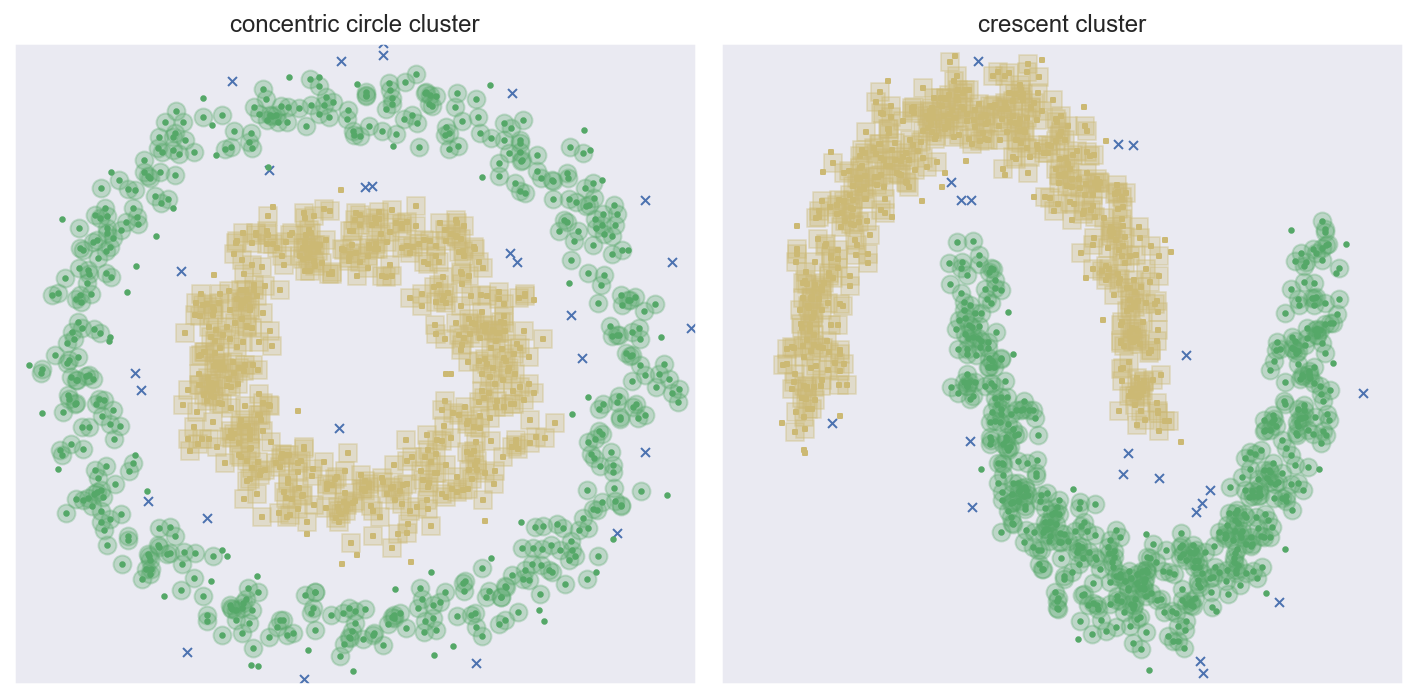

In [60]:
from sklearn.datasets import make_circles, make_moons
from sklearn.cluster import DBSCAN

n_samples = 1000
np.random.seed(2)
X1, y1 = make_circles(n_samples=n_samples, factor=.5, noise=.09)
X2, y2 = make_moons(n_samples=n_samples, noise=.1)

def plot_DBSCAN(title, X, eps, xlim, ylim):
    model = DBSCAN(eps=eps)
    y_pred = model.fit_predict(X)
    idx_outlier = model.labels_ == -1
    plt.scatter(X[idx_outlier, 0], X[idx_outlier, 1], marker='x', lw=1, s=20)
    plt.scatter(X[model.labels_ == 0, 0], X[model.labels_ == 0, 1], marker='o', facecolor='g', s=5)
    plt.scatter(X[model.labels_ == 1, 0], X[model.labels_ == 1, 1], marker='s', facecolor='y', s=5)
    X_core = X[model.core_sample_indices_, :]
    idx_core_0 = np.array(list(set(np.where(model.labels_ == 0)[0]).intersection(model.core_sample_indices_)))
    idx_core_1 = np.array(list(set(np.where(model.labels_ == 1)[0]).intersection(model.core_sample_indices_)))
    plt.scatter(X[idx_core_0, 0], X[idx_core_0, 1], marker='o', facecolor='g', s=80, alpha=0.3)
    plt.scatter(X[idx_core_1, 0], X[idx_core_1, 1], marker='s', facecolor='y', s=80, alpha=0.3)
    plt.grid(False)
    plt.xlim(*xlim)
    plt.ylim(*ylim)
    plt.xticks(())
    plt.yticks(())
    plt.title(title)
    return y_pred

plt.figure(figsize=(10, 5))
plt.subplot(121)
y_pred1 = plot_DBSCAN("concentric circle cluster", X1, 0.1, (-1.2, 1.2), (-1.2, 1.2))
plt.subplot(122)
y_pred2 = plot_DBSCAN("crescent cluster", X2, 0.1, (-1.5, 2.5), (-0.8, 1.2))
plt.tight_layout()
plt.show()

- 지금 위 사진 보면, 점 밖에 다른 점이 감싸고 있는 애들이 core data
- 감싸여 있지 않고, 작은 점만 있으면 border data
- `x` 표시가 outlier

이 군집화 결과의 ARI와 AMI 값은 다음과 같다.

In [62]:
from sklearn.metrics.cluster import adjusted_mutual_info_score, adjusted_rand_score

print("concentric circle cluster ARI:", adjusted_rand_score(y1, y_pred1))
print("concentric circle cluster AMI:", adjusted_mutual_info_score(y1, y_pred1))
print("crescent cluster:", adjusted_rand_score(y2, y_pred2))
print("crescent cluster:", adjusted_mutual_info_score(y2, y_pred2))

concentric circle cluster ARI: 0.9414262371038592
concentric circle cluster AMI: 0.8967648464619998
crescent cluster: 0.9544844153926417
crescent cluster: 0.9151495815452476


#### 연습 문제 14.3.1

MNIST Digit 데이터를 디비스캔 군집화하고 군집의 갯수, ARI, AMI를 각각 계산하라.<br>
-1이 섞여있어서 실루엣 스코어는 안나온다. 

In [257]:
from sklearn.datasets import load_digits
from sklearn.cluster import DBSCAN

digits = load_digits()

model = DBSCAN(eps=24, min_samples=10)
y_pred = model.fit_predict(digits.data)

In [258]:
np.unique(model.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9])

In [259]:
from sklearn.metrics import confusion_matrix

confusion_matrix(digits.target, y_pred)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1, 177,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  4,   0, 151,   0,   0,   0,   0,   0,   0,  27,   0],
       [ 30,   0,   0,   0,   0,   0, 147,   0,   0,   0,   0],
       [ 21,   0, 162,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 16,   0,   1,   0, 164,   0,   0,   0,   0,   0,   0],
       [ 16,   0, 165,   1,   0,   0,   0,   0,   0,   0,   0],
       [  3,   0,   1, 177,   0,   0,   0,   0,   0,   0,   0],
       [ 15,   0,   0,   0,   0, 152,   0,   1,  11,   0,   0],
       [ 62,   0, 112,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 33,   0, 124,   0,   0,   0,   0,   8,   0,   0,  15]])

In [260]:
from sklearn.metrics.cluster import adjusted_mutual_info_score, adjusted_rand_score, silhouette_score

print("ARI:", adjusted_rand_score(digits.target, y_pred))
print("AMI:", adjusted_mutual_info_score(digits.target, y_pred))

ARI: 0.4049790871244583
AMI: 0.6858429684472868


## OPTICS

[sklearn-optimcs](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.OPTICS.html)

EPS가 중요하다는 것을 알고, EPS를 지가 여러가지 싹다 try해본다. <br>
`maximum eps`를 정해주면 거기까지 시도를 해본다. <br>
그 맥시멈 안에서 어떤 eps들을 시도 해볼 것인지가 이 알고리즘의 핵심이겠지. <br>
그 방법을 metric에 정해준다. 

맨 처음에 데이터 하나하나를 각자 하나의 cluster로 가정한다. <br>
가장 비슷한 cluster끼리의 거리를 측정해서 하나씩 묶어가는 방법.<br>

유리창에 빗물이 떨어질때, 빗물 한방울 한방울 있던 것들이 뭉쳐져서 더 커지고 하잖아. <br>

단, 맨 처음에 데이터 하나하나 클러스터로 놓고 볼때는, 데이터와 데이터간의 거리 자체가 곧 클러스터 간의 거리 측정이기 때문에 그때는 쉽게 거리를 측정가능<br>
그런데, 하나의 여러개의 데이터가 하나의 클러스터 이루고 있는 경우, 두 클러스터간의 거리를 어떻게 잴 것이냐?가 이 알고리즘의 핵심. <br>

크게 두가지 거리측정법이 있다. 
1. hierarchical 방법에서만 쓸 수 있는 계층적인 거리측정법. 
2. hierarchical이 아닌 방법에서도 쓸 수 있는 비계층적 거리측정법. 

# 계층적 군집화

**계층적 군집화(hierachical clustering)**는 여러개의 군집 중에서 가장 유사도가 높은 혹은 거리가 가까운 군집 두 개를 선택하여 하나로 합치면서 군집 개수를 줄여 가는 방법을 말한다. **합체 군집화(agglomerative clustering)**라고도 한다. 가장 처음에는 모든 군집이 하나의 데이터만을 가진다. 따라서 최초에는 데이터 개수만큼 군집이 존재하지만 군집을 합치면서 최종적으로 하나의 군집만 남게 된다.

### 군집간의 거리 측정

계측정 군집화를 하려면 우선 모든 군집 간에 거리를 측정해야 한다. 군집 간의 거리를 측정하는 방법에는 계층적 방법에 의존하지 않는 비계층적 방법과 이미 이전 단계에서 계층적 방법으로 군집이 합쳐진 적인 있다는 가정을 하는 계층적 방법 두 가지가 있다.

### 비계층적 거리 측정법

비계층적 거리측정법은 계층적 군집화가 아니더라도 모든 경우에 사용할 수 있는 거리 측정 방법이다. 중심거리, 단일거리, 완전거리, 평균거리 등이 있다. 다음에 설명할 계층적 거리측정법에 비해 계산량이 많은 단점이 있다.

#### 중심(centroid)거리

두 군집의 중심점(centroid)를 정의한 다음 두 중심점의 거리를 군집간의 거리로 정의한다. 가장 직관적인 방법. 각각 클러스터의 평균값으로 중심 잡아서 그 중심과 중심 사이의 거리를 측정. 

$$
d(u,v) = \|c_u - c_v\|_2
$$

여기에서 $d(u,v)$는 군집 $u$와 군집 $v$ 사이의 거리를 뜻한다. 또한 $c_u$와 $c_v$는 각각 두 군집 $u$와 $v$의 중심점이다. 군집의 중심점은 그 클러스에 포함된 모든 데이터의 평균을 사용한다.

$$
c_u = \dfrac{1}{|u|}\sum_i u_i
$$

이 식에서 $|\cdot|$ 기호는 군집의 원소의 갯수를 말한다. 

single, complete 거리는, <br>
1군집에 5개, 2군집에 5개가 있으면, 5x5=25개를 싹다 잰다. 
- 그 25개 중에 가장 짧은 거리를 군집간의 거리로 사용하는 것이 `single distance`
- 그 25개 중 가장 긴 거리를 군집간의 거리로 사용하는 것이 `complete distance`
- 25개를 싹다 평균을 내서 정하면 `average distance`


#### 단일(single)거리

군집 $u$의 모든 데이터 $u_i$와 군집 $v$의 모든 데이터 $v_j$의 모든 조합에 대해 데이터 사이의 거리 $d(u_i,v_j)$를 측정해서 가장 작은 값을 구한다. 최소 거리(Nearest Point) 방법이라고도 한다.

$$
d(u,v) = \min(d(u_i,v_j))
$$

#### 완전(complete)거리

군집 $u$의 모든 데이터 $u_i$와 군집 $v$의 모든 데이터 $v_j$의 모든 조합에 대해 데이터 사이의 거리 $d(u_i,v_j)$를 측정해서 가장 큰 값을 구한다. 최장 거리(Farthest Point) 방법이라고도 한다.

$$
d(u,v) = \max(d(u_i,v_j))
$$

#### 평균(average)거리

군집 $u$의 모든 데이터 $u_i$와 군집 $v$의 모든 데이터 $v_j$의 모든 조합에 대해 데이터 사이의 거리 $d(u_i,v_j)$를 측정해서 평균을 구한다. $|u|$와 $|v|$는 각각 두 군집의 원소의 갯수를 뜻한다.

$$
   d(u,v) = \sum_{i,j} \frac{d(u_i, v_j)}{|u||v|}
$$


### 계층적 거리 측정법

계층적 거리 측정법은 **계층적 군집화에서만** 사용할 수 있는 방법이다. 즉, 이전 단계에서 이미 어떤 두 개의 군집이 하나로 합쳐진 적이 있다고 가정하여 이 정보를 사용하는 측정법이다. 비계층적 거리 측정법에 비해 계산량이 적어 효율적이다.

hierarchical clustering에서는 어떤 클러스터가 존재하면, 원래 어떤 클러스터 두개가 합쳐져서 그 클러스터가 됬는지에 대한 정보가 남아있다. <br>
그리고, 이전단계에서 왜 걔네 둘이 선택됬는지에 대한 이유도 남아있다. <br>

즉, 해당 클러스터를 이루고 있는 각각의 미니클러스터에 대한 거리가 이미 정의가 되어 있어서 그것을 사용한다는 것. 

#### 중앙값(median)거리

이 방법은 중심거리 방법의 변형이다. 중심거리 방법처럼 군집의 중심점의 거리를 군집간의 거리라고 한다. 하지만 군집의 중심점을 계산하는 방법이 다르다. 만약 군집 $u$가 군집 $s$와 군집 $t$가 결합하여 생겼다면 

$$ 
u \leftarrow s + t 
$$

군집 $u$의 중심점은 새로 계산하지 않고 원래 군집의 두 군집의 중심점의 평균을 사용한다.

$$
c_u = \dfrac{1}{2}(c_s + s_t)
$$

따라서 해당 군집의 모든 데이터를 평균하여 중심점을 구하는 것 보다 계산이 빠르다.

![1_161.jpeg](./materials/1_161.jpeg)

#### 가중(weighted)거리

가중거리를 사용하려면 원래 어떤 두 개의 군집이 합쳐져서 하나의 군집이 만들어졌는지 알아야 한다. 만약 군집 $u$가 군집 $s$와 군집 $t$가 결합하여 생겼다면 

$$ 
u \leftarrow s + t 
$$

이 군집 $u$와 다른 군집 $v$ 사이의 거리는 군집 $u$를 구성하는 원래 군집 $s$, $t$와 $v$ 사이의 두 거리의 평균을 사용한다.

$$
   d(u,v) = \dfrac{1}{2}(d(s,v) + d(t,v))
$$


![1_161.jpeg](./materials/1_162.jpeg)

![1_160.png](./materials/1_160.png)

In [261]:
%load_ext tikzmagic

ModuleNotFoundError: No module named 'tikzmagic'

In [262]:
%%tikz -p kotex,pgfplots,amsmath -l arrows.meta,calc,positioning,shapes -s 2000,1200 -f png

\coordinate (left bottom) at (1, 1);
\coordinate (right top) at (10, 5);
\fill[white, use as bounding box] (left bottom) rectangle (right top);
\draw[help lines, white] (left bottom) grid (right top);
\tikzset{
    >=stealth,font={\ttfamily\normalsize},
}
\tikzset{node/.style={draw, ellipse, minimum width=1.5cm, minimum height=1cm}}

\node[node] at (3,3) (v) {$v$};
\node[node] at (7,3.8) (t) {$t$};
\node[node] at (7,2.2) (s) {$s$};
\node[node, minimum width=3cm,, minimum height=3.8cm] at (7,3) (u) {$u$};
\draw[<->] (v) -- (u);
\draw[<->] (v) -- (s);
\draw[<->] (v) -- (t);

UsageError: Cell magic `%%tikz` not found.


#### 와드(Ward)거리

와드거리는 가중거리방법의 변형이다. 만약 군집 $u$가 군집 $s$와 군집 $t$가 결합하여 생겼다면 

$$ 
u \leftarrow s + t 
$$

이 군집 $u$와 다른 군집 $v$ 사이의 거리를 구하는데 있어서 군집 $u$를 구성하는 원래 군집 $s$, $t$와 $v$ 사이의 거리를 사용하는 것은 가중거리 방법과 같지만 원래의 두 군집 $s$, $t$가 너무 가까우면 $v$와의 거리가 더 먼것으로 인식한다. 

$$
   d(u,v) = \sqrt{\frac{|v|+|s|}{|v|+|s|+|t|}d(v,s)^2 + \frac{|v|+|t|}{|v|+|s|+|t|}d(v,t)^2 - \frac{|v|}{|v|+|s|+|t|}d(s,t)^2}
$$

![1_165.jpeg](./materials/1_165.jpeg)

In [ ]:
%%tikz -p kotex,pgfplots,amsmath -l arrows.meta,calc,positioning,shapes -s 2000,1200 -f png

\coordinate (left bottom) at (-2, 0);
\coordinate (right top) at (10, 6);
\fill[white, use as bounding box] (left bottom) rectangle (right top);
\draw[help lines, white] (left bottom) grid (right top);
\tikzset{
    >=stealth,font={\ttfamily\normalsize},
}
\tikzset{node/.style={draw, ellipse, minimum width=1.5cm, minimum height=1cm}}

\node[node] at (4,3) (v) {$v$};
\node[node] at (8.4,3.8) (s1) {$s_1$};
\node[node] at (8.4,2.2) (t1) {$t_1$};
\node[node, minimum width=3cm,, minimum height=3.8cm] at (8.4,3) (u1) {\hspace{-4em}$u_1$};
\node[node] at (0,4.5) (s2) {$s_2$};
\node[node] at (0,1.5) (t2) {$t_2$};
\node[node, minimum width=3cm,, minimum height=4.8cm] at (0,3) (u2) {\hspace{4em}$u_2$};
\draw[<->] (v) -- (u1);
\draw[<->] (v) -- (s1);
\draw[<->] (v) -- (t1);
\draw[<->] (s1) -- (t1);
\draw[<->] (v) -- (u2);
\draw[<->] (v) -- (s2);
\draw[<->] (v) -- (t2);
\draw[<->] (s2) -- (t2);

![1_163.png](./materials/1_164.png)

### Hierarchical Clustering 정리

1. 맨 처음에는 데이터 하나가 클러스터 하나. 
    - 이때는 클러스터 간의 거리 측정하는게 쉽지. 그냥 데이터 사이의 거리야. 그럼 싹다 측정 가능하지. 
    - 그 중에서 제일 가까운애 붙어서 하나의 클러스터가 된다. 
2. 그 다음부터는 ward distance방법을 적용해서, 제일 가까운놈 붙여 가면 된다. 

### scipy의 계층적 군집화

파이썬으로 계층적 군집화를 하려면 사이파이 패키지의 `linkage` 명령을 사용하거나 사이킷런 패키지의 `AgglomerativeClustering` 클래스를 사용한다. 각각 장단점이 있는데 사이파이 패키지는 군집화 결과를 트리 형태로 시각화해주는 `dendrogram` 명령도 지원한다.

이 `Dendrogram`은 사이킷런과 사이파이에 둘다 구현되어 있다. <br>
그런데 각각 장단점이 있다. 
- scipy의 linkage/Dendrogram
- scikit-learn의 `AgglomerativeClusterings`는 추가기능이 더 있다. 문서 봐야 한다. 

기본적인 기능은 똑같다. 

MNIST digit 이미지 중 20개의 이미지를 무작위로 골라 계층적 군집화를 적용해보자.

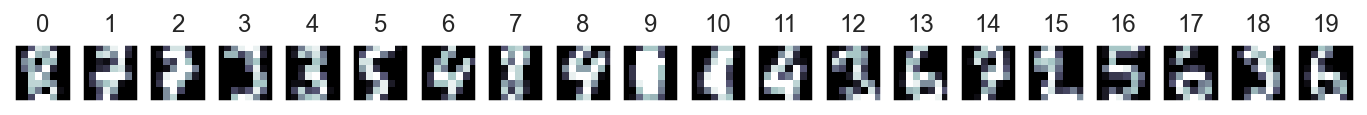

In [263]:
from sklearn.datasets import load_digits

digits = load_digits()
n_image = 20
np.random.seed(0)
idx = np.random.choice(range(len(digits.images)), n_image)
X = digits.data[idx]
images = digits.images[idx]

plt.figure(figsize=(12, 1))
for i in range(n_image):
    plt.subplot(1, n_image, i + 1)
    plt.imshow(images[i], cmap=plt.cm.bone)
    plt.grid(False)
    plt.xticks(())
    plt.yticks(())
    plt.title(i)

linkage하고 데이터 넣으면 끝. 

In [264]:
from scipy.cluster.hierarchy import linkage, dendrogram

# data, distance
Z = linkage(X, 'ward')
Z

array([[ 3.        , 18.        , 23.51595203,  2.        ],
       [13.        , 19.        , 25.27844932,  2.        ],
       [ 1.        , 14.        , 28.67054237,  2.        ],
       [17.        , 21.        , 31.04298096,  3.        ],
       [ 4.        ,  7.        , 31.51190251,  2.        ],
       [ 6.        ,  8.        , 32.54228019,  2.        ],
       [ 9.        , 10.        , 33.36165464,  2.        ],
       [ 0.        , 24.        , 34.51086785,  3.        ],
       [ 2.        , 22.        , 37.03151811,  3.        ],
       [11.        , 26.        , 43.25505751,  3.        ],
       [12.        , 15.        , 45.31004304,  2.        ],
       [16.        , 20.        , 45.36151085,  3.        ],
       [ 5.        , 27.        , 53.54437412,  4.        ],
       [30.        , 32.        , 56.6892112 ,  6.        ],
       [25.        , 29.        , 60.16809786,  5.        ],
       [28.        , 34.        , 66.61618922,  8.        ],
       [31.        , 33.

지금 위에 말하는게, 데이터 붙은거 보여주는거야 <br>
- 제일 먼저 3번과 18번이 붙은 것. 그때의 거리 23.515, 그리고 마지막에 2는 3번과 18번이 합쳐져서 된 클러스터는 데이터가 2개짜리 클러스터가 되었다. 이 뜻.
- 그 다음 13,19. 거리 25.278, 얘네 둘이 합쳐진 클러스터 2개짜리가 되었다. 
- 그 다음이 중요해. **17과 21이 뭐야?** 데이터 20개 밖에(클러스터 0번 - 19번) 없는데. 당연하지만, 21번은 새로 만들어 진 것. 순서대로, (3, 8)이 합쳐져서 20이 되었고, (13, 19)가 합쳐져서 21번이 되었겠지. 

- 마지막 35번과 37번 클러스터 합쳐져서 총 20개가 되는 것. 


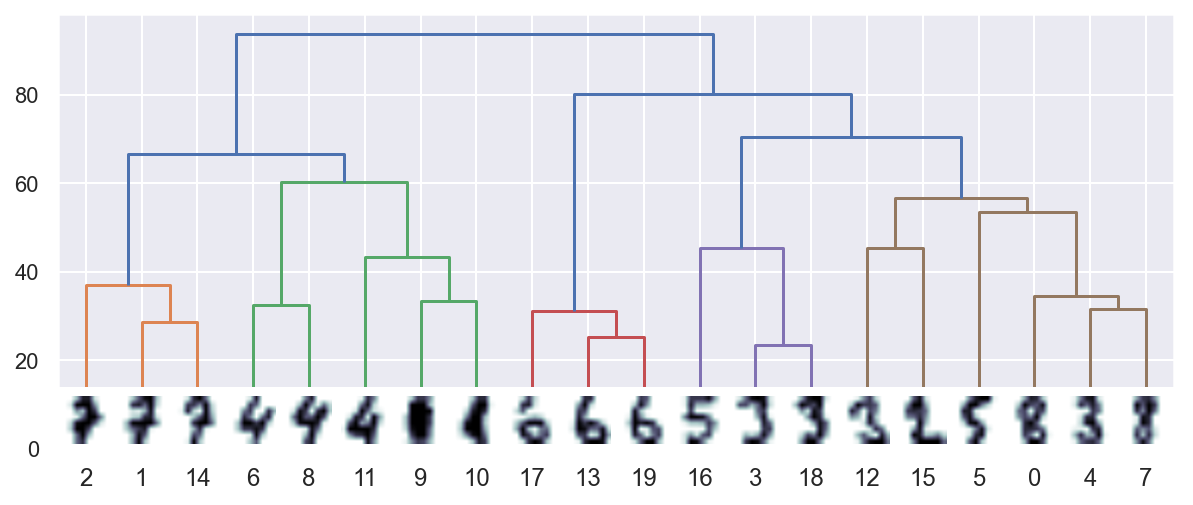

In [265]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

plt.figure(figsize=(10, 4))
ax = plt.subplot()

ddata = dendrogram(Z)

dcoord = np.array(ddata["dcoord"])
icoord = np.array(ddata["icoord"])
leaves = np.array(ddata["leaves"])
idx = np.argsort(dcoord[:, 2])
dcoord = dcoord[idx, :]
icoord = icoord[idx, :]
idx = np.argsort(Z[:, :2].ravel())
label_pos = icoord[:, 1:3].ravel()[idx][:20]

for i in range(20):
    imagebox = OffsetImage(images[i], cmap=plt.cm.bone_r, interpolation="bilinear", zoom=3)
    ab = AnnotationBbox(imagebox, (label_pos[i], 0),  box_alignment=(0.5, -0.1), 
                        bboxprops={"edgecolor" : "none"})
    ax.add_artist(ab)

plt.show()

이걸 **Dendrogram**이라고 부른다. <br>
가로 선이 낮을수록 먼저 붙은 것. <br>
제일 먼저 붙은 애가 3,18이지. <br>
그 다음이 13 + 19, 그 다음이 1 + 14, 그 다음이 (13+17 cluster) + 17<br>
절대로 똑같은 높이는 존재하지 않는다. 무조건 한번에 하나만 합쳐진다. 미세하게 다 차이가 난다. <br>


마지막에 가면 하나로 다 붙는거지. 그래서 두개로 나누고 싶으면, 이걸 보면서 끊으면 되는거야. 

# Affinity Propagation

모든 데이터가 특정한 기준에 따라 자신을 대표할 대표 데이터를 선택한다. 만약 스스로가 자기 자신을 대표하게 되면 클러스터의 중심이 된다.

* responsibility $r(i, k)$

    * $k$번째 데이터가 $i$번째 데이터의 대표가 되어야 한다는 근거


* availability $a(i, k)$

    * $i$번째 데이터가 $k$번째 데이터를 대표로 선택해야 한다는 근거
    
  
* responsibility와 availability를 모두 0으로 놓고 다음 수식을 수렴할 때까지 반복

$$ r(i, k) \leftarrow s(i, k) - \max_{k' \neq k} ( a(i, k') + s(i, k')) $$

$$ a(i, k) \leftarrow \min(0, r(k, k) + \sum_{i' \neq i,k} r(i', k)) $$


여기에서 $s(i,k)$는 다음과 같이 음의 거리로 정의되는 유사도이다.

$$ s(i,k) = -|| x_i - x_k ||^2 $$

특히 $s(k,k)$는 특정한 음수 값으로 사용자가 정해 주게 되는데 이 값에 따라서 클러스터의 갯수가 달라지는 하이퍼 모수가 된다. $s(k,k)$가 크면 자기 자신에 대한 유사도가 커져서 클러스터의 수가 증가한다.

위 알고리즘으로 계산하는 $r$, $a$가 더 이상 변화하지 않고 수렴하면 계산이 종료되고 종료 시점에서 $r(k,k) + a(k,k) > 0$이 데이터가 클러스터의 중심이 된다.

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import *

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=300, centers=centers, cluster_std=0.5, random_state=0)

model = AffinityPropagation(preference=-50).fit(X)

cluster_centers_indices = model.cluster_centers_indices_
labels = model.labels_
n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)
print("Adjusted Rand Index: %0.3f" % adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f" % adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f" % silhouette_score(X, labels, metric='sqeuclidean'))

In [ ]:
from itertools import cycle

colors = cycle('rgb')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col, alpha=0.25)
    plt.plot(cluster_center[0], cluster_center[1], 'o', mec='k', mew=3, markersize=7)

plt.show()